# Phase 1 Project

## Introduction

This project is geared toward providing actionable insights for a company that is planning to expand its aviation division and make informed decisions about which aircraft to purchase. By analyzing aviation incident data from the "AviationData.csv" and "USState_Codes.csv" datasets, the project aims to identify key patterns related to aircraft performance, safety records, and geographic risk factors. Through data cleaning and in-depth analysis, the findings will help the company understand which aircraft models are more reliable, safer, and best suited for their operations, ensuring data-driven decisions for future investments.






### Dataset explanation

For this project, I am presented with two datasets, "AviationData.csv" and "USState_Codes.csv," which were downloaded from Kaggle for analysis. Using this data, I am required to perform data cleaning and analysis to derive findings and actionable insights. These insights will help the head of a new aviation division make informed decisions about which aircraft to purchase. The analysis will focus on identifying patterns, trends, and key factors relevant to aircraft performance and safety.

## Objectives

1. Describe the data
2. Clean the data
3. Perform statistical analysis of the data
4. Find emerging trends and patterns in the cleaned data

## Description  of the datasets

### Importing Modules

In [34]:
##Importing pandas, matplotlib.pyplot, numpy, seaborn using aliases
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

%matplotlib inline

### Loading Datasets

In [35]:
#Load AviationData.csv as a dataframe "df", change encoding, add memory
df = pd.read_csv('AviationData.csv', encoding='Latin', low_memory=False)
#Display the dataframe head
df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


### Information about the dataframe


In this analysis, I will explore the dataset structure using df.columns and determine its size with df.shape. I will also apply df.describe() to generate summary statistics, providing insights into key numeric values like fatalities and injuries, helping assess and prepare the data for further analysis.

In [36]:
#Find the columns in the dataframe
df.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')

In [37]:
#Finding the shape, number of columns and rows
df.shape

(88889, 31)

In [38]:
#Finding key statistics of the dataframe
df.describe

<bound method NDFrame.describe of              Event.Id Investigation.Type Accident.Number  Event.Date  \
0      20001218X45444           Accident      SEA87LA080  1948-10-24   
1      20001218X45447           Accident      LAX94LA336  1962-07-19   
2      20061025X01555           Accident      NYC07LA005  1974-08-30   
3      20001218X45448           Accident      LAX96LA321  1977-06-19   
4      20041105X01764           Accident      CHI79FA064  1979-08-02   
...               ...                ...             ...         ...   
88884  20221227106491           Accident      ERA23LA093  2022-12-26   
88885  20221227106494           Accident      ERA23LA095  2022-12-26   
88886  20221227106497           Accident      WPR23LA075  2022-12-26   
88887  20221227106498           Accident      WPR23LA076  2022-12-26   
88888  20221230106513           Accident      ERA23LA097  2022-12-29   

              Location        Country   Latitude   Longitude Airport.Code  \
0      MOOSE CREEK, ID  

In [39]:
#Finding the data types of columns in the dataset
df.dtypes

Event.Id                   object
Investigation.Type         object
Accident.Number            object
Event.Date                 object
Location                   object
Country                    object
Latitude                   object
Longitude                  object
Airport.Code               object
Airport.Name               object
Injury.Severity            object
Aircraft.damage            object
Aircraft.Category          object
Registration.Number        object
Make                       object
Model                      object
Amateur.Built              object
Number.of.Engines         float64
Engine.Type                object
FAR.Description            object
Schedule                   object
Purpose.of.flight          object
Air.carrier                object
Total.Fatal.Injuries      float64
Total.Serious.Injuries    float64
Total.Minor.Injuries      float64
Total.Uninjured           float64
Weather.Condition          object
Broad.phase.of.flight      object
Report.Status 

#### What have I learnt?

The dataset contains 88,889 aviation incidents with 31 columns detailing event dates, locations, aircraft info, and injury severities. It has missing values in key fields like geographic data and injuries, and mixed data types that require cleaning. The dataset contains different columns which have data of two data types, objects, and float values, 

## Cleaning the datasets

At this stage, null values and duplicates will be checked for. I intend to improve the quality and reliability of the dataset by removing duplicates and handling null values. This process ensures that redundant or incomplete data is eliminated, reducing potential biases and errors. Addressing missing data will be caried out either by removal or imputation, and eliminating duplicate records. 

### Finding with Null Values

In [40]:
# Calculating and displaying null values per column as a percentage of the entire DataFrame
null_percentage = (df.isnull().sum() / len(df)) * 100
print(null_percentage)


Event.Id                   0.000000
Investigation.Type         0.000000
Accident.Number            0.000000
Event.Date                 0.000000
Location                   0.058500
Country                    0.254250
Latitude                  61.320298
Longitude                 61.330423
Airport.Code              43.469946
Airport.Name              40.611324
Injury.Severity            1.124999
Aircraft.damage            3.593246
Aircraft.Category         63.677170
Registration.Number        1.481623
Make                       0.070875
Model                      0.103500
Amateur.Built              0.114750
Number.of.Engines          6.844491
Engine.Type                7.961615
FAR.Description           63.974170
Schedule                  85.845268
Purpose.of.flight          6.965991
Air.carrier               81.271023
Total.Fatal.Injuries      12.826109
Total.Serious.Injuries    14.073732
Total.Minor.Injuries      13.424608
Total.Uninjured            6.650992
Weather.Condition          5

In [41]:
#Finding duplicated rows in the dataset
df.duplicated().sum()

0

Based on a 30% missing data threshold recommended by vast data cleaning information sources, the columns that should be removed include Latitude (61.32%), Longitude (61.33%), Airport.Code (43.47%), Airport.Name (40.61%), Aircraft.Category (63.68%), FAR.Description (63.97%), Schedule (85.85%), and Air.carrier (81.27%). Additionally, columns like Total.Fatal.Injuries (12.83%), Total.Serious.Injuries (14.07%), Total.Minor.Injuries (13.42%), and Publication.Date (15.49%) may be considered for removal depending on their importance to the analysis. Removing these columns improves data quality by addressing significant gaps.

In [42]:
# Identifying columns with more than 30% missing data
missing_threshold = 0.30
columns_to_drop = df.columns[df.isnull().mean() > missing_threshold]

# Dropping the columns from the DataFrame
df = df.drop(columns=columns_to_drop)

# Display the columns that were dropped
print("Columns to be dropped due to missing more than 30% of data: ", [element for element in columns_to_drop])

# Display the cleaned DataFrame (first few rows)
df.head()


Columns to be dropped due to missing more than 30% of data:  ['Latitude', 'Longitude', 'Airport.Code', 'Airport.Name', 'Aircraft.Category', 'FAR.Description', 'Schedule', 'Air.carrier', 'Broad.phase.of.flight']


,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Injury.Severity,Aircraft.damage,Registration.Number,Make,...,Number.of.Engines,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,Fatal(2),Destroyed,NC6404,Stinson,...,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,UNK,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,Fatal(4),Destroyed,N5069P,Piper,...,1.0,Reciprocating,Personal,4.0,0.0,0.0,0.0,UNK,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,Fatal(3),Destroyed,N5142R,Cessna,...,1.0,Reciprocating,Personal,3.0,NaN,NaN,NaN,IMC,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,Fatal(2),Destroyed,N1168J,Rockwell,...,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,IMC,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,Fatal(1),Destroyed,N15NY,Cessna,...,NaN,NaN,Personal,1.0,2.0,NaN,0.0,VMC,Probable Cause,16-04-1980


For numeric columns like Total.Fatal.Injuries, Total.Serious.Injuries, Total.Minor.Injuries, and Total.Uninjured, median imputation is used to replace missing values with the median, which helps handle outliers. For categorical columns such as Injury.Severity, Aircraft.damage, Weather.Condition, and others, mode imputation is applied, filling missing values with the most frequent value in each column. Additionally, "Unknown" is used for the Location and Country columns, ensures that these gaps are visible and won't skew the analysis which could misrepresent the data. This process helps prepare the dataset for analysis by addressing missing data in a contextually relevant way while retaining the data integrity.

In [43]:
# Mean/Median imputation for numeric columns
df['Total.Fatal.Injuries'].fillna(df['Total.Fatal.Injuries'].median(), inplace=True)
df['Total.Serious.Injuries'].fillna(df['Total.Serious.Injuries'].median(), inplace=True)
df['Total.Minor.Injuries'].fillna(df['Total.Minor.Injuries'].median(), inplace=True)
df['Total.Uninjured'].fillna(df['Total.Uninjured'].median(), inplace=True)

# Mode imputation for categorical columns
df['Injury.Severity'].fillna(df['Injury.Severity'].mode()[0], inplace=True)
df['Aircraft.damage'].fillna(df['Aircraft.damage'].mode()[0], inplace=True)
df['Weather.Condition'].fillna(df['Weather.Condition'].mode()[0], inplace=True)
df['Registration.Number'].fillna(df['Registration.Number'].mode()[0], inplace=True)
df['Make'].fillna(df['Make'].mode()[0], inplace=True)
df['Model'].fillna(df['Model'].mode()[0], inplace=True)
df['Amateur.Built'].fillna(df['Amateur.Built'].mode()[0], inplace=True)
df['Number.of.Engines'].fillna(df['Number.of.Engines'].mode()[0], inplace=True)
df['Engine.Type'].fillna(df['Engine.Type'].mode()[0], inplace=True)
df['Purpose.of.flight'].fillna(df['Purpose.of.flight'].mode()[0], inplace=True)
df['Report.Status'].fillna(df['Report.Status'].mode()[0], inplace=True)
df['Publication.Date'].fillna(df['Publication.Date'].mode()[0], inplace=True)

# Fill missing values in 'Location' and 'Country' with 'Unknown'
df['Location'].fillna('Unknown', inplace=True)
df['Country'].fillna('Unknown', inplace=True)


Looking to see if there are any null values in the dataframe

In [44]:
#Finding null values
df.isnull().values.sum()

0

All null values have been populated. Finding columns that have been left after the removal.

## Familiarize with the cleaned data

What unique Values exist in the dataset? What are we dealing with? The following columns will be investigated for unique values:
Investigation.Type, Locations, Countries, Make, Models, Engine.Type, Purpose.Of.Flight

In [45]:
# Unique engines
print(f'There are {df["Engine.Type"].nunique()} unique engines: ')
df['Engine.Type'].unique()

There are 13 unique engines: 


array(['Reciprocating', 'Turbo Fan', 'Turbo Shaft', 'Unknown',
       'Turbo Prop', 'Turbo Jet', 'None', 'Electric', 'Hybrid Rocket',
       'Geared Turbofan', 'LR', 'NONE', 'UNK'], dtype=object)

In [46]:
# Unique Makes
print(f'There are {df["Make"].nunique()} distinct aircraft makes: ')
df['Make'].unique()

There are 8237 distinct aircraft makes: 


array(['Stinson', 'Piper', 'Cessna', ..., 'JAMES R DERNOVSEK',
       'ORLICAN S R O', 'ROYSE RALPH L'], dtype=object)

In [47]:
# Unique Models
print(f'There are {df["Model"].nunique()} distinct aircraft models: ')
df['Model'].unique()

There are 12318 distinct aircraft models: 


array(['108-3', 'PA24-180', '172M', ..., 'ROTORWAY EXEC 162-F',
       'KITFOX S5', 'M-8 EAGLE'], dtype=object)

During an incident, what investigations are carried out in the aircraft industry?

In [48]:
# Investigation Types
print(f'There are {df["Investigation.Type"].nunique()} investigation types: ')
df['Investigation.Type'].unique()

There are 2 investigation types: 


array(['Accident', 'Incident'], dtype=object)

What locations and countries did these incidents occur?

In [49]:
# Countries where these incidents took place
print(f'These incidents took place in {df["Country"].nunique()} Countries: ')
df['Country'].unique()

These incidents took place in 219 Countries: 


array(['United States', 'Unknown', 'GULF OF MEXICO', 'Puerto Rico',
       'ATLANTIC OCEAN', 'HIGH ISLAND', 'Bahamas', 'MISSING', 'Pakistan',
       'Angola', 'Germany', 'Korea, Republic Of', 'Martinique',
       'American Samoa', 'PACIFIC OCEAN', 'Canada', 'Bolivia', 'Mexico',
       'Dominica', 'Netherlands Antilles', 'Iceland', 'Greece', 'Guam',
       'Australia', 'CARIBBEAN SEA', 'West Indies', 'Japan',
       'Philippines', 'Venezuela', 'Bermuda', 'San Juan Islands',
       'Colombia', 'El Salvador', 'United Kingdom',
       'British Virgin Islands', 'Netherlands', 'Costa Rica',
       'Mozambique', 'Jamaica', 'Panama', 'Guyana', 'Norway', 'Hong Kong',
       'Portugal', 'Malaysia', 'Turks And Caicos Islands',
       'Northern Mariana Islands', 'Dominican Republic', 'Suriname',
       'Honduras', 'Congo', 'Belize', 'Guatemala', 'Anguilla', 'France',
       'St Vincent And The Grenadines', 'Haiti', 'Montserrat',
       'Papua New Guinea', 'Cayman Islands', 'Sweden', 'Taiwan',
    

In [50]:
# Locations where these incidents took place
print(f'These incidents took place in {df["Location"].nunique()} locations: ')
df['Location'].unique()

These incidents took place in 27758 locations: 


array(['MOOSE CREEK, ID', 'BRIDGEPORT, CA', 'Saltville, VA', ...,
       'San Manual, AZ', 'Auburn Hills, MI', 'Brasnorte, '], dtype=object)

What is the purpose for flight

In [51]:
# Unique purposes of flight
print(f'There are {df["Purpose.of.flight"].nunique()} purposes of flight: ')
df['Purpose.of.flight'].unique()

There are 26 purposes of flight: 


array(['Personal', 'Business', 'Instructional', 'Unknown', 'Ferry',
       'Executive/corporate', 'Aerial Observation', 'Aerial Application',
       'Public Aircraft', 'Skydiving', 'Other Work Use', 'Positioning',
       'Flight Test', 'Air Race/show', 'Air Drop',
       'Public Aircraft - Federal', 'Glider Tow',
       'Public Aircraft - Local', 'External Load',
       'Public Aircraft - State', 'Banner Tow', 'Firefighting',
       'Air Race show', 'PUBS', 'ASHO', 'PUBL'], dtype=object)

With this information, I will look to answer the following questions:




## Statistical analysis of the dataset

Performing statistical analysis is essential to understand the dataset, detect data quality issues like outliers, and uncover relationships between variables. It helps turn raw data into actionable insights, guiding decision-making and allowing me to test hypotheses with data-driven evidence. In this project, it will help identify trends in aviation incidents, supporting informed decisions about aircraft purchases, safety measures, and current trends.

In this section, I intend to perform the following:

    1. Find distributions in the numerical data
    2. Perform correlation analysis
    3. Perform frequency counts for categorical data
    4. Find data outliers
    5. Conduct trend analysis
    6. Carry out geographical analysis
    7. Compare all the above metrics and come up with insights

### Analysis of the numerical data

Find numerical columns in the dataframe:

In [52]:
#numerical columns in the dataframe
numeric_columns = [col for col in df.columns if df[col].dtype in ['float64', 'int64']]
numeric_columns

['Number.of.Engines',
 'Total.Fatal.Injuries',
 'Total.Serious.Injuries',
 'Total.Minor.Injuries',
 'Total.Uninjured']

Find the count, mean, standard deviation, minimum value, quantiles, and maximum values of the numerical columns in the dataframe using the .describe() method. The mean gives the average value, which shows the central tendency of a dataset, similar to the quantiles. The min and max values on the other hand give the outliers of the dataset. 

In [53]:
df[['Number.of.Engines', 'Total.Fatal.Injuries', 'Total.Serious.Injuries', 
    'Total.Minor.Injuries', 'Total.Uninjured']].describe()


,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,88889.000000,88889.000000,88889.000000,88889.000000,88889.000000
mean,1.136552,0.564761,0.240491,0.309127,5.037755
std,0.432545,5.126649,1.434614,2.083715,26.990914
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


Find the median of numerical values in the dataset. The median represents the middle value. Comparing the two helps understand if the data is skewed. For example, if the mean is higher than the median, it suggests the presence of higher values pulling the average up.

In [54]:
median = df[['Number.of.Engines', 'Total.Fatal.Injuries', 'Total.Serious.Injuries',
    'Total.Minor.Injuries', 'Total.Uninjured']].median()

print(f'\n\nThe median of the numerical columns are:\n\n{median}')



The median of the numerical columns are:

Number.of.Engines         1.0
Total.Fatal.Injuries      0.0
Total.Serious.Injuries    0.0
Total.Minor.Injuries      0.0
Total.Uninjured           1.0
dtype: float64


Finding the variance and standard deviation of numerical values in the dataset. The variance measures how spread out the data is, and the standard deviation gives this spread in the same units as the data. These are crucial for understanding the variability within the dataset, helping to identify whether most accidents result in similar outcomes or if there is wide fluctuation.

In [55]:
variance = df[['Number.of.Engines', 'Total.Fatal.Injuries', 'Total.Serious.Injuries',
    'Total.Minor.Injuries', 'Total.Uninjured']].var()

standard_deviation = df[['Number.of.Engines', 'Total.Fatal.Injuries', 'Total.Serious.Injuries',
    'Total.Minor.Injuries', 'Total.Uninjured']].std()

print(f'The variance of the numerical columns are:\n\n{variance}')

print(f'\n\nThe standard deviation of the numerical columns are:\n\n{standard_deviation}')

The variance of the numerical columns are:

Number.of.Engines           0.187095
Total.Fatal.Injuries       26.282529
Total.Serious.Injuries      2.058118
Total.Minor.Injuries        4.341866
Total.Uninjured           728.509420
dtype: float64


The standard deviation of the numerical columns are:

Number.of.Engines          0.432545
Total.Fatal.Injuries       5.126649
Total.Serious.Injuries     1.434614
Total.Minor.Injuries       2.083715
Total.Uninjured           26.990914
dtype: float64


Create a correlation matrix. The covariance matrix is a measure of how two variables change together. It helps quantify the direction of the linear relationship between variables. 

In [56]:
correlation_matrix = df[['Number.of.Engines', 'Total.Fatal.Injuries', 'Total.Serious.Injuries',
                         'Total.Minor.Injuries', 'Total.Uninjured']].corr()
print(correlation_matrix)


                        Number.of.Engines  Total.Fatal.Injuries  \
Number.of.Engines                1.000000              0.050789   
Total.Fatal.Injuries             0.050789              1.000000   
Total.Serious.Injuries           0.028226              0.108066   
Total.Minor.Injuries             0.052285              0.035698   
Total.Uninjured                  0.344710             -0.015009   

                        Total.Serious.Injuries  Total.Minor.Injuries  \
Number.of.Engines                     0.028226              0.052285   
Total.Fatal.Injuries                  0.108066              0.035698   
Total.Serious.Injuries                1.000000              0.216400   
Total.Minor.Injuries                  0.216400              1.000000   
Total.Uninjured                       0.042116              0.098340   

                        Total.Uninjured  
Number.of.Engines              0.344710  
Total.Fatal.Injuries          -0.015009  
Total.Serious.Injuries         0.04211

Skewness measures the asymmetry of the data distribution. Kurtosis measures the "tailedness" or the presence of extreme values (outliers). These metrics help in understanding the distribution's shape and whether outliers dominate.

In [57]:
# Calculating skewness using pandas
skewness = df[['Number.of.Engines', 'Total.Fatal.Injuries', 'Total.Serious.Injuries',
               'Total.Minor.Injuries', 'Total.Uninjured']].skew()

# Calculating kurtosis using pandas
kurtosis = df[['Number.of.Engines', 'Total.Fatal.Injuries', 'Total.Serious.Injuries',
               'Total.Minor.Injuries', 'Total.Uninjured']].kurt()

print("Skewness:\n", skewness)
print("Kurtosis:\n", kurtosis)


Skewness:
 Number.of.Engines          2.706529
Total.Fatal.Injuries      35.318019
Total.Serious.Injuries    53.005957
Total.Minor.Injuries      93.380236
Total.Uninjured            9.413431
dtype: float64
Kurtosis:
 Number.of.Engines            13.149635
Total.Fatal.Injuries       1552.209819
Total.Serious.Injuries     4315.727391
Total.Minor.Injuries      14193.993494
Total.Uninjured             112.312668
dtype: float64


Correlation measures the strength of the relationship between two variables. Strong correlations can highlight factors that might be contributing to higher injury or fatality rates, helping in understanding key drivers of safety outcomes.

In [58]:
# Correlation matrix for the numerical columns
correlation_matrix = df[['Number.of.Engines', 'Total.Fatal.Injuries', 'Total.Serious.Injuries',
                         'Total.Minor.Injuries', 'Total.Uninjured']].corr()

print("Correlation Matrix:\n", correlation_matrix)


Correlation Matrix:
                         Number.of.Engines  Total.Fatal.Injuries  \
Number.of.Engines                1.000000              0.050789   
Total.Fatal.Injuries             0.050789              1.000000   
Total.Serious.Injuries           0.028226              0.108066   
Total.Minor.Injuries             0.052285              0.035698   
Total.Uninjured                  0.344710             -0.015009   

                        Total.Serious.Injuries  Total.Minor.Injuries  \
Number.of.Engines                     0.028226              0.052285   
Total.Fatal.Injuries                  0.108066              0.035698   
Total.Serious.Injuries                1.000000              0.216400   
Total.Minor.Injuries                  0.216400              1.000000   
Total.Uninjured                       0.042116              0.098340   

                        Total.Uninjured  
Number.of.Engines              0.344710  
Total.Fatal.Injuries          -0.015009  
Total.Serious.Inj

## Insights from statistical analysis the numerical data

### Number of Engines
From the measures of central tendencies in the .describe(), We can gather that: 

The mean engines used in aircrafts is 1.14, slightly higher than the median of 1, indicating a lot of planes with 1 engine are involved in incidences, with the slight difference between mean and median indicating some planes with more than 1 engine are involved in incidences.

#### Plot to support the same
A plot of number of engines against number of incidences can help prove this

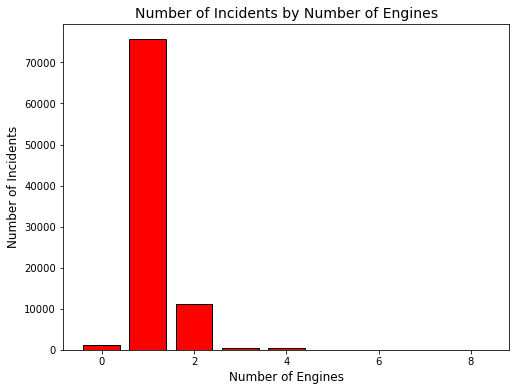

In [59]:
# Counting the number of incidents for each number of engines
engine_incidents = df['Number.of.Engines'].value_counts().sort_index()

# Plotting the bar graph
plt.figure(figsize=(8, 6))
plt.bar(engine_incidents.index, engine_incidents.values, color='red', edgecolor='black')

# Adding titles and labels
plt.title('Number of Incidents by Number of Engines', fontsize=14)
plt.xlabel('Number of Engines', fontsize=12)
plt.ylabel('Number of Incidents', fontsize=12)

# Show plot
plt.show()

### Total Fatal Injuries
With a mean of 0.56 and a median of 0, it indicates that most incidents do not have fatalities, but have big outliers, indicating when incidents occur, they claim a lot of fatalities

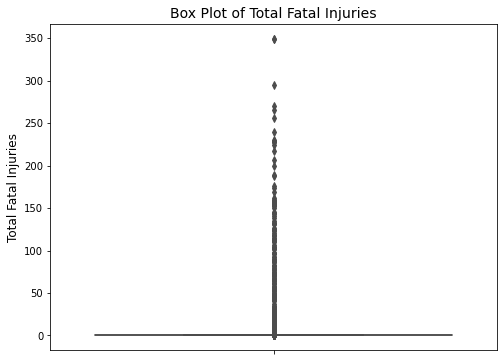

In [60]:
# Box plot for Total Fatal Injuries
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['Total.Fatal.Injuries'], color='red')

# Adding titles and labels
plt.title('Box Plot of Total Fatal Injuries', fontsize=14)
plt.ylabel('Total Fatal Injuries', fontsize=12)

# Show plot
plt.show()

### Total serious and Minor Injuries

They both have a median of 0, which shows accidents rarely result in any injuries, but with a mean of 0.24 for serious injuries and 0.31 for minor injuries, it is probable that when incidents occur they could lead to significant injuries

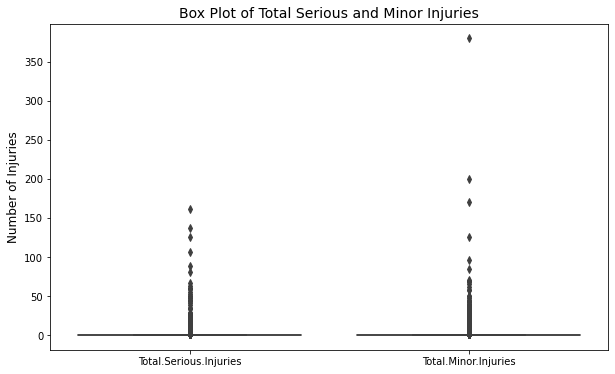

In [61]:
# Box plot for Total Serious and Minor Injuries
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['Total.Serious.Injuries', 'Total.Minor.Injuries']])
plt.title('Box Plot of Total Serious and Minor Injuries', fontsize=14)
plt.ylabel('Number of Injuries', fontsize=12)
plt.show()

### Total Uninjured

There mean of total uninjured people is 5.4, way higher than the mode of 1 which means accidents involve a single uninjured person, but there are a few incidents where many passengers escape unscathed

### Variance and Standard deviations

First, the Total Fatal Injuries has a very high variance (26.28) and standard deviation (5.13), which could be an indicator that in many incidences, there exists the presence of extreme events with many fatalities. 

The Total Uninjured also has a high standard deviation (26.99), which shows significant variation in the number of passengers escape without injuries. This indicates that some accidents result in everyone surviving, while others have a smaller proportion of survivors.

### Corelation, Skewness and Kurtosis

1. Number of Engines is weakly correlated with all injury-related metrics, indicating that having more engines does not strongly influence the number of fatalities or injuries.However from the mean, they have been involved in a lot more incidences. 
2. Total Minor Injuries has a modest correlation with Total Serious Injuries (0.216), suggesting that accidents with serious injuries are somewhat more likely to also involve minor injuries.
3. All numerical columns exhibit positive skewness, meaning the distributions are heavily skewed to the right. This suggests that most accidents involve low or no fatalities/injuries, but there are a few extreme cases where many injuries or fatalities occur.
4. Kurtosis is extremely high, especially for Total.Fatal.Injuries (1552.21), Total.Serious.Injuries (4315.73), and Total.Minor.Injuries (14193.99). This indicates the presence of significant outliers—major accidents with high numbers of fatalities and injuries are very rare but highly impactful when they occur.

## Insights from statistical analysis categorical and numerical data

In [29]:
# Grouping by Make and Model and summing the Fatal incidents for all combinations
fatality_sums = df[df['Injury.Severity'] == 'Fatal'].groupby(['Make', 'Model']).size()

# Sorting and printing all make and model fatality counts
fatality_sums_sorted = fatality_sums.sort_values(ascending=False)

# Displaying the result
fatality_sums_sorted

Make                Model           
CESSNA              172                 96
ROBINSON            R44                 80
CESSNA              182                 56
PIPER               PA28                50
CIRRUS DESIGN CORP  SR22                47
                                        ..
DIAL DAVID L        TITAN TORNADO II     1
DIAMOND             DA 20-C1             1
                    DA-40                1
                    DA40                 1
de Havilland        DHC-2 MK I           1
Length: 2680, dtype: int64

In [63]:
# Grouping by Engine Type to sum the fatal incidents
fatality_by_engine = df[df['Injury.Severity'] == 'Fatal'].groupby('Engine.Type').size()

# Sorting and displaying the engine types with the highest number of fatal incidents
fatality_by_engine_sorted = fatality_by_engine.sort_values(ascending=False)

# Displaying the top 10 engine types with the most fatal incidents
fatality_by_engine_sorted.head(10)

Engine.Type
Reciprocating    4648
Turbo Prop        275
Turbo Shaft       243
Turbo Fan          58
Turbo Jet          27
Unknown             7
Electric            2
Hybrid Rocket       1
None                1
dtype: int64

In [70]:
# Grouping by Country to get the total number of incidents per country
incidents_by_country = df.groupby('Country').size()

# Sorting the countries by number of incidents in descending order and selecting the top 5
top_5_countries = incidents_by_country.sort_values(ascending=False).head(5)

# Grouping by Country, Make, and Model to analyze accident frequency
incidents_by_country_model = df.groupby(['Country', 'Make', 'Model']).size()

# Loop through each of the top 5 countries and display the top 10 models for each
for country in top_5_countries.index:
    print(f"Top 10 aircraft models with the most incidents in {country}:")
    
    # Filter for the specific country
    country_incidents = incidents_by_country_model.loc[country]
    
    # Sort the results and display the top 10 models with the highest number of incidents
    country_incidents_sorted = country_incidents.sort_values(ascending=False).head(10)
    
    # Displaying the result
    print(country_incidents_sorted)
    print("\n")


Top 10 aircraft models with the most incidents in United States:
Make    Model    
Cessna  152          2158
        172          1225
        172N          980
Piper   PA-28-140     798
Cessna  150           709
        172M          645
        172P          591
Piper   PA-18         536
Cessna  150M          534
Piper   PA-28-161     495
dtype: int64


Top 10 aircraft models with the most incidents in Brazil:
Make      Model
ROBINSON  R44      19
PIPER     PA25     10
BOEING    737       9
BEECH     58        8
BELL      206       7
CESSNA    182       7
          210       7
BEECH     C90       6
CESSNA    188       5
          208       5
dtype: int64


Top 10 aircraft models with the most incidents in Canada:
Make      Model
ROBINSON  R44      9
BOEING    737      8
Bell      206B     7
Cessna    A185F    5
CESSNA    172      5
Cessna    208B     4
BOEING    767      4
CESSNA    182      4
Cessna    172      3
BELL      206B     3
dtype: int64


Top 10 aircraft models with the mo

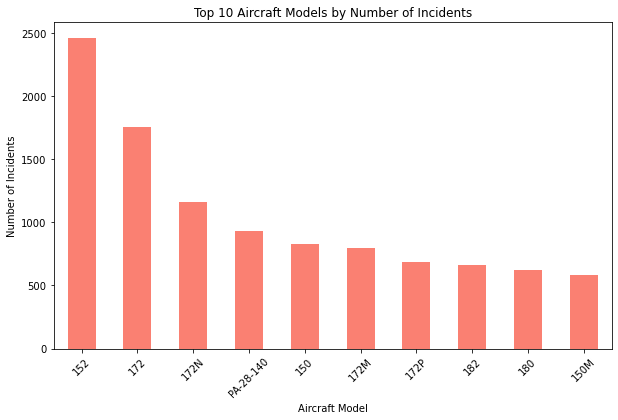

In [71]:
import matplotlib.pyplot as plt

# Group by Model and count the number of incidents
incidents_by_model = df['Model'].value_counts().head(10)  # Top 10 models by incident count

# Plot the result
plt.figure(figsize=(10, 6))
incidents_by_model.plot(kind='bar', color='salmon')
plt.title('Top 10 Aircraft Models by Number of Incidents')
plt.xlabel('Aircraft Model')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=45)
plt.show()


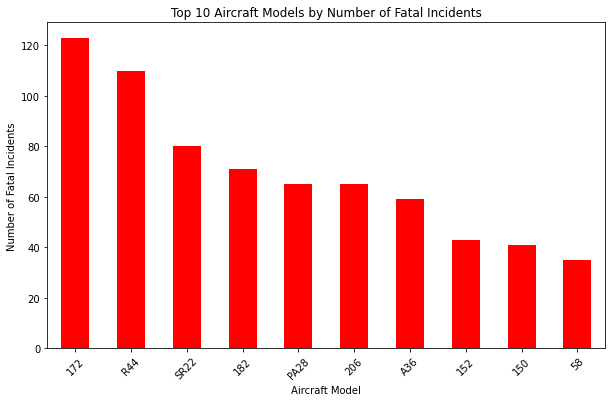

In [72]:
# Group by Model and count the number of fatal incidents
fatal_incidents_by_model = df[df['Injury.Severity'] == 'Fatal']['Model'].value_counts().head(10)

# Plot the result
plt.figure(figsize=(10, 6))
fatal_incidents_by_model.plot(kind='bar', color='red')
plt.title('Top 10 Aircraft Models by Number of Fatal Incidents')
plt.xlabel('Aircraft Model')
plt.ylabel('Number of Fatal Incidents')
plt.xticks(rotation=45)
plt.show()


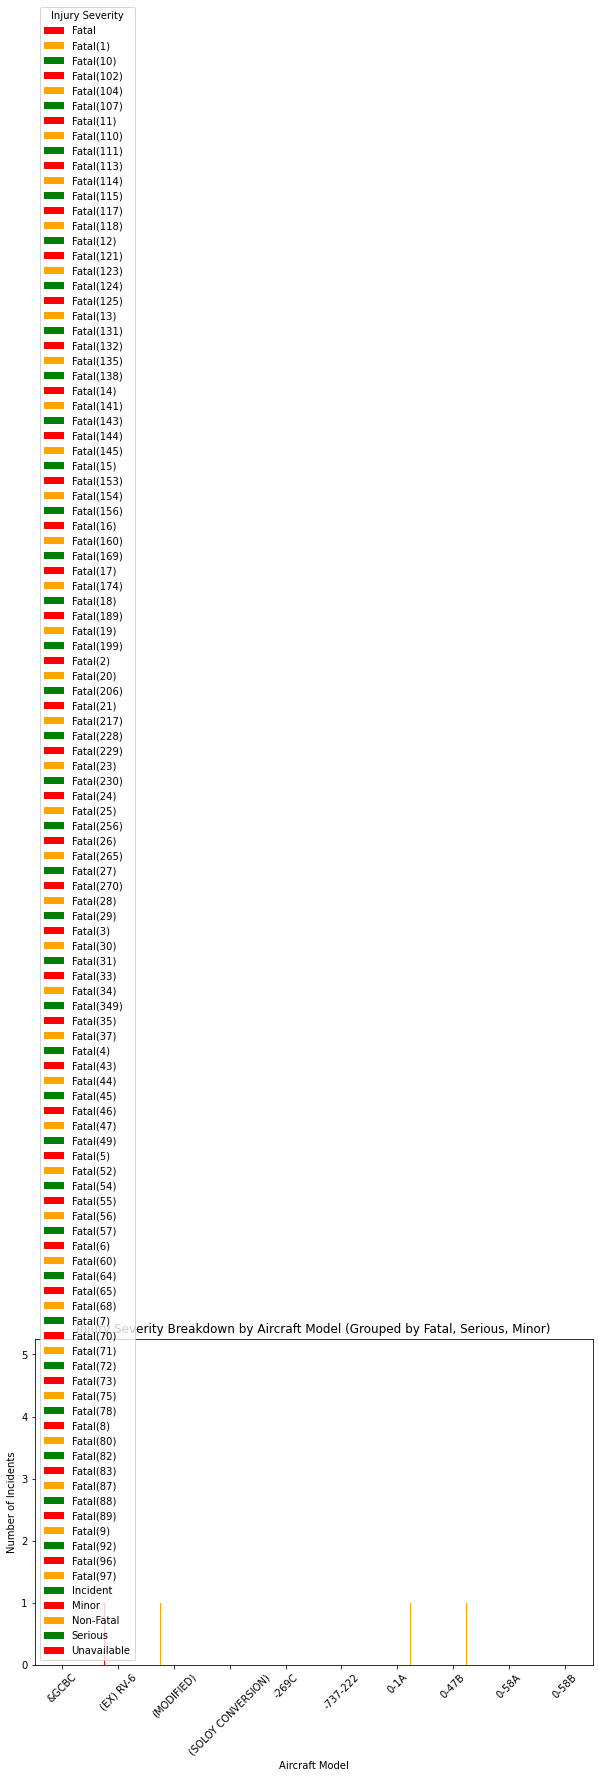

In [92]:
# Ensure injury severity contains three levels
df['Injury.Severity'] = df['Injury.Severity'].replace({
    'Fatal': 'Fatal',       # Keep fatal incidents labeled as 'Fatal'
    'Serious': 'Serious',   # Keep serious incidents labeled as 'Serious'
    'Minor': 'Minor',       # Keep minor incidents labeled as 'Minor'
})

# Group by Model and Injury Severity, count the number of incidents
injury_severity_by_model = df.groupby(['Model', 'Injury.Severity']).size().unstack().fillna(0).head(10)

# Plot a grouped bar chart (side by side bars for each severity level)
injury_severity_by_model.plot(kind='bar', stacked=False, figsize=(10, 6), color=['red', 'orange', 'green'])
plt.title('Injury Severity Breakdown by Aircraft Model (Grouped by Fatal, Serious, Minor)')
plt.xlabel('Aircraft Model')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=45)
plt.legend(title='Injury Severity')
plt.show()


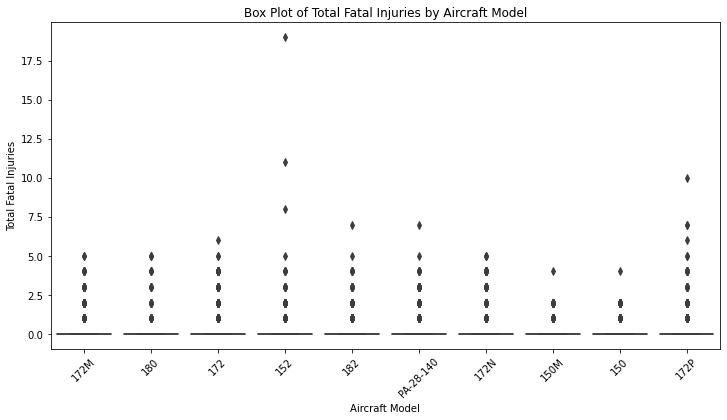

In [74]:
import seaborn as sns

# Filter data for models with more than 5 incidents for meaningful comparison
top_models = df['Model'].value_counts().head(10).index
df_filtered = df[df['Model'].isin(top_models)]

# Box plot for fatal injuries
plt.figure(figsize=(12, 6))
sns.boxplot(x='Model', y='Total.Fatal.Injuries', data=df_filtered)
plt.title('Box Plot of Total Fatal Injuries by Aircraft Model')
plt.xlabel('Aircraft Model')
plt.ylabel('Total Fatal Injuries')
plt.xticks(rotation=45)
plt.show()


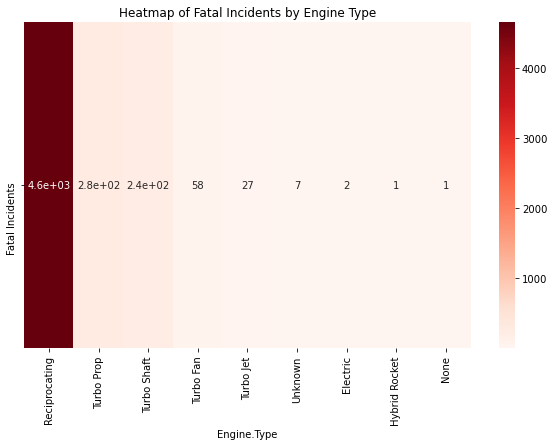

In [75]:
# Group by Engine Type and Injury Severity (for Fatal incidents)
fatal_by_engine_type = df[df['Injury.Severity'] == 'Fatal'].groupby('Engine.Type').size()

# Convert to DataFrame and sort
fatal_by_engine_type = fatal_by_engine_type.reset_index().rename(columns={0: 'Fatal Incidents'}).sort_values(by='Fatal Incidents', ascending=False).head(10)

# Plot a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(fatal_by_engine_type.set_index('Engine.Type').T, annot=True, cmap="Reds")
plt.title('Heatmap of Fatal Incidents by Engine Type')
plt.show()


<Figure size 720x432 with 0 Axes>

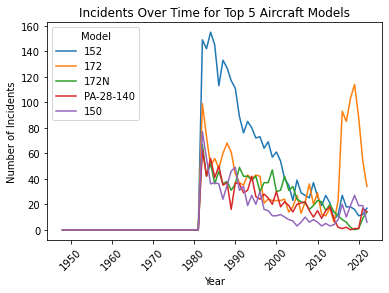

In [78]:
# Automatically select the top 5 models by total incident count
top_models = df['Model'].value_counts().head(5).index

# Group by year and model, and select the top models
incidents_over_time = df.groupby(['Year', 'Model']).size().unstack().fillna(0)[top_models]

# Plot the time series
plt.figure(figsize=(10, 6))
incidents_over_time.plot()
plt.title('Incidents Over Time for Top 5 Aircraft Models')
plt.xlabel('Year')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=45)
plt.show()


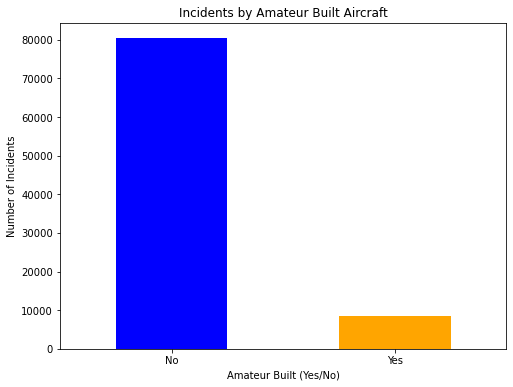

In [94]:
# Group by Amateur.Built and count the number of incidents
amateur_built_counts = df['Amateur.Built'].value_counts()

# Plot the bar chart
plt.figure(figsize=(8, 6))
amateur_built_counts.plot(kind='bar', color=['blue', 'orange'])
plt.title('Incidents by Amateur Built Aircraft')
plt.xlabel('Amateur Built (Yes/No)')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=0)
plt.show()

In [ ]:
# Group by Report.Status and Injury.Severity, count the number of incidents
injury_by_report_status = df.groupby(['Report.Status', 'Injury.Severity']).size().unstack().fillna(0)

# Plot a grouped bar chart (side by side bars)
injury_by_report_status.plot(kind='bar', stacked=False, figsize=(10, 6), color=['green', 'orange', 'red'])
plt.title('Injury Severity Breakdown by Report Status (Grouped)')
plt.xlabel('Report Status')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=45)
plt.legend(title='Injury Severity')
plt.show()
